In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("XLMRoBERTLargeRuSentimentResults.xlsx")

In [ ]:
df.describe()

,act,yearNormalized,numOfActs,numOfSpeakersMale,numOfSpeakersFemale,scoreXLMRuSentiment
count,117042.000000,117042.000000,117042.000000,117042.000000,117042.000000,117042.000000
mean,2.081501,1858.599494,3.472027,14.691974,4.848072,0.807505
std,1.501313,47.812361,1.792308,16.329971,3.092020,0.183362
min,-7.000000,1747.000000,0.000000,1.000000,0.000000,0.279814
25%,1.000000,1826.000000,3.000000,6.000000,3.000000,0.657064
50%,2.000000,1861.000000,4.000000,9.000000,4.000000,0.868542
75%,3.000000,1889.000000,5.000000,17.000000,6.000000,0.977461
max,6.000000,1947.000000,6.000000,88.000000,17.000000,0.998787


In [ ]:
df_cleaned = df.dropna(subset=['expertSentiment'])
df_cleaned

,,author,act,scene,speaker,text,expertSentiment,yearNormalized,normalizedGenre,numOfActs,numOfSpeakersMale,numOfSpeakersFemale,scoreXLMRuSentiment,XLMSentiment
4592,Балаганчик,Блок,0,NaN,Первый мистик,Ты слушаешь?,NEUTRAL,1906,NaN,0,11,4,0.998256,NEUTRAL
4593,Балаганчик,Блок,0,NaN,Второй мистик,Да.,NEUTRAL,1906,NaN,0,11,4,0.988473,NEUTRAL
4594,Балаганчик,Блок,0,NaN,Третий мистик,Наступит событие.,NEUTRAL,1906,NaN,0,11,4,0.977888,NEUTRAL
4595,Балаганчик,Блок,0,NaN,Пьеро,"О, вечный ужас, вечный мрак!",NEGATIVE,1906,NaN,0,11,4,0.988697,NEGATIVE
4596,Балаганчик,Блок,0,NaN,Первый мистик,Ты ждешь?,NEUTRAL,1906,NaN,0,11,4,0.995452,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116908,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Рюрик,Неоспорима по крайней мере есть истина на сей ...,NEUTRAL,1786,NaN,5,21,2,0.900992,NEUTRAL
116909,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Едвинда,"Либо простить, аки брата.",NEUTRAL,1786,NaN,5,21,2,0.940177,NEUTRAL
116910,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Рюрик,"Но пусть Рюрик в сей день окажется, каков есть...",NEUTRAL,1786,NaN,5,21,2,0.818808,NEUTRAL
116911,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Вадим,"О, государь, ты к победам рожден, ты милосерди...",POSITIVE,1786,NaN,5,21,2,0.458331,POSITIVE


In [ ]:
#R_df = df_cleaned[df_cleaned['expertSentiment'] != 'SKIP']
matches = (df_cleaned['XLMSentiment'] == df_cleaned['expertSentiment']).sum()
total = len(df_cleaned)
print(matches / total)

0.7391884676988788


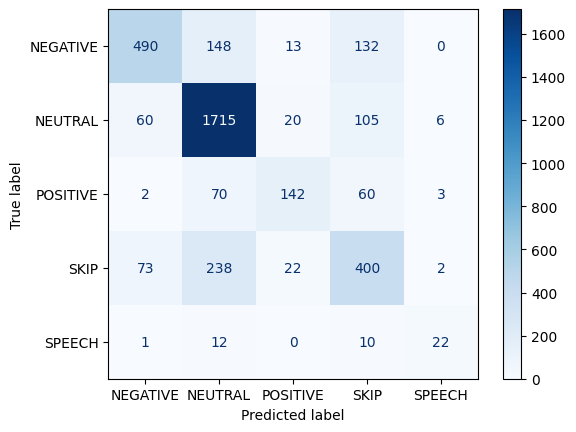

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE', 'SKIP', 'SPEECH']

cm = confusion_matrix(df_cleaned['expertSentiment'],  df_cleaned['XLMSentiment'], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_cleaned['expertSentiment'], df_cleaned['XLMSentiment']))

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.63      0.70       783
     NEUTRAL       0.79      0.90      0.84      1906
    POSITIVE       0.72      0.51      0.60       277
        SKIP       0.57      0.54      0.55       735
      SPEECH       0.67      0.49      0.56        45

    accuracy                           0.74      3746
   macro avg       0.70      0.61      0.65      3746
weighted avg       0.74      0.74      0.73      3746



In [ ]:
# positive negative metrics

In [ ]:
positive_to_negative = df_cleaned[(df_cleaned['expertSentiment'] == 'POSITIVE') & (df_cleaned['XLMSentiment'] == 'NEGATIVE')].shape[0]
negative_to_positive = df_cleaned[(df_cleaned['expertSentiment'] == 'NEGATIVE') & (df_cleaned['XLMSentiment'] == 'POSITIVE')].shape[0]
total_opposite_errors = positive_to_negative + negative_to_positive
print(f"Количество ошибок 'POSITIVE → NEGATIVE': {positive_to_negative}")
print(f"Количество ошибок 'NEGATIVE → POSITIVE': {negative_to_positive}")
print(f"Общее количество критических ошибок: {total_opposite_errors}")

Количество ошибок 'POSITIVE → NEGATIVE': 2
Количество ошибок 'NEGATIVE → POSITIVE': 13
Общее количество критических ошибок: 15


In [ ]:
df_cleaned

,,author,act,scene,speaker,text,expertSentiment,yearNormalized,normalizedGenre,numOfActs,numOfSpeakersMale,numOfSpeakersFemale,scoreXLMRuSentiment,XLMSentiment
4592,Балаганчик,Блок,0,NaN,Первый мистик,Ты слушаешь?,NEUTRAL,1906,NaN,0,11,4,0.998256,NEUTRAL
4593,Балаганчик,Блок,0,NaN,Второй мистик,Да.,NEUTRAL,1906,NaN,0,11,4,0.988473,NEUTRAL
4594,Балаганчик,Блок,0,NaN,Третий мистик,Наступит событие.,NEUTRAL,1906,NaN,0,11,4,0.977888,NEUTRAL
4595,Балаганчик,Блок,0,NaN,Пьеро,"О, вечный ужас, вечный мрак!",NEGATIVE,1906,NaN,0,11,4,0.988697,NEGATIVE
4596,Балаганчик,Блок,0,NaN,Первый мистик,Ты ждешь?,NEUTRAL,1906,NaN,0,11,4,0.995452,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116908,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Рюрик,Неоспорима по крайней мере есть истина на сей ...,NEUTRAL,1786,NaN,5,21,2,0.900992,NEUTRAL
116909,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Едвинда,"Либо простить, аки брата.",NEUTRAL,1786,NaN,5,21,2,0.940177,NEUTRAL
116910,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Рюрик,"Но пусть Рюрик в сей день окажется, каков есть...",NEUTRAL,1786,NaN,5,21,2,0.818808,NEUTRAL
116911,Из жизни Рюрика,ЕкатеринаII,5,ЯВЛЕНИЕ V.,Вадим,"О, государь, ты к победам рожден, ты милосерди...",POSITIVE,1786,NaN,5,21,2,0.458331,POSITIVE


In [ ]:
df1 = pd.read_excel("RuBERTDeepPavlov.xlsx")

In [ ]:
merged_df = pd.merge(
    df_cleaned[['text', 'expertSentiment']],
    df1[['text', 'sentimentLabel']],
    on='text',
    how='inner'
)

merged_df.drop_duplicates(inplace=True)

In [ ]:
merged_df

,text,expertSentiment,sentimentLabel
0,Ты слушаешь?,NEUTRAL,NEUTRAL
2,Да.,NEUTRAL,NEUTRAL
129,Наступит событие.,NEUTRAL,NEUTRAL
130,"О, вечный ужас, вечный мрак!",NEGATIVE,NEGATIVE
131,Ты ждешь?,NEUTRAL,NEGATIVE
...,...,...,...
7796,Неоспорима по крайней мере есть истина на сей ...,NEUTRAL,NEUTRAL
7797,"Либо простить, аки брата.",NEUTRAL,NEGATIVE
7798,"Но пусть Рюрик в сей день окажется, каков есть...",NEUTRAL,NEGATIVE
7799,"О, государь, ты к победам рожден, ты милосерди...",POSITIVE,NEGATIVE


In [ ]:
merged_df = merged_df[~merged_df['expertSentiment'].isin(['SKIP', 'SPEECH'])]
merged_df

,text,expertSentiment,sentimentLabel
0,Ты слушаешь?,NEUTRAL,NEUTRAL
2,Да.,NEUTRAL,NEUTRAL
129,Наступит событие.,NEUTRAL,NEUTRAL
130,"О, вечный ужас, вечный мрак!",NEGATIVE,NEGATIVE
131,Ты ждешь?,NEUTRAL,NEGATIVE
...,...,...,...
7796,Неоспорима по крайней мере есть истина на сей ...,NEUTRAL,NEUTRAL
7797,"Либо простить, аки брата.",NEUTRAL,NEGATIVE
7798,"Но пусть Рюрик в сей день окажется, каков есть...",NEUTRAL,NEGATIVE
7799,"О, государь, ты к победам рожден, ты милосерди...",POSITIVE,NEGATIVE


In [ ]:
print(classification_report(merged_df['expertSentiment'], merged_df['sentimentLabel']))

              precision    recall  f1-score   support

    NEGATIVE       0.42      0.67      0.52       781
     NEUTRAL       0.79      0.61      0.69      1851
    POSITIVE       0.47      0.38      0.42       276

    accuracy                           0.61      2908
   macro avg       0.56      0.56      0.54      2908
weighted avg       0.66      0.61      0.62      2908



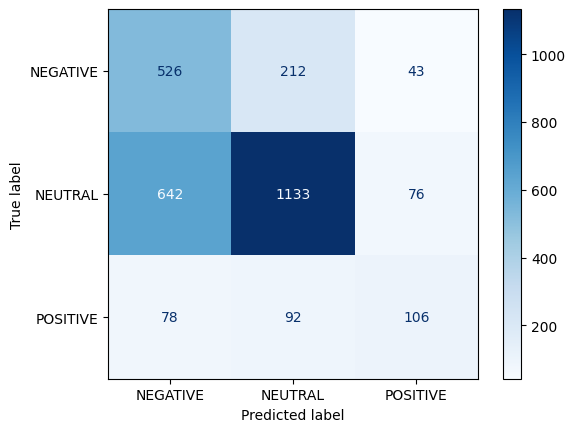

In [ ]:
labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
cm = confusion_matrix(merged_df['expertSentiment'],  merged_df['sentimentLabel'], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()